# Neural Network
Thông tin thành viên (Họ tên - MSSV):
- Thành viên 1: Võ Trung Tín - 22127417
- Thành viên 2: Nguyễn Trần Đức Thiện - 22127397

## Kiểm tra môi trường code

In [1]:
import sys
sys.executable

'c:\\Users\\DUC THIEN\\.conda\\envs\\ml-env\\python.exe'

## Import các thư viện cần thiết

In [2]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil
import os

## Đọc và kiểm tra tập dữ liệu import từ thư viện

In [3]:
np.random.seed(0) # tạo ra số giả ngẫu nhiên dựa trên giá trị seed 
(train_X, train_y),(test_X, test_y)=cifar10.load_data() # tải tập dữ liệu lên và lưu vào 4 mảng train_X, train_y và test_X, test_y
print('Số ảnh dùng để train:',len(train_X))
print('Số ảnh dùng để test :',len(test_X))
print('Kích cỡ ảnh train :',train_X.shape)
print('Kích cỡ train_label :',train_y.shape)
print('Kích cỡ ảnh test :',test_X.shape)
print('Kích cỡ test_label :',test_y.shape)

print('Ma trận pixel của một bức tranh:\n', train_X[0])

Số ảnh dùng để train: 50000
Số ảnh dùng để test : 10000
Kích cỡ ảnh train : (50000, 32, 32, 3)
Kích cỡ train_label : (50000, 1)
Kích cỡ ảnh test : (10000, 32, 32, 3)
Kích cỡ test_label : (10000, 1)
Ma trận pixel của một bức tranh:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Nhìn vào các pixel của bức tranh ta thấy đây là một ma trận 3 chiều

## Khám phá dữ liệu huấn luyện

Ta hãy thử xem mặt mũi của vài ảnh trong `train_X` với label trong `train_y`

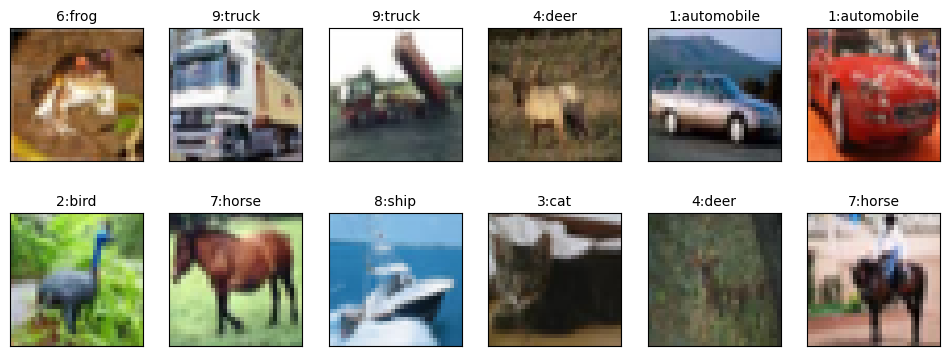

In [4]:
label_dict={0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer",
            5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}
# Tạo một từ điển và gán các giá trị từ 0 đến 9 cho các loại ảnh tương ứng với 10 classes

def showImageandLabel(images, labels,  idx, num=10):
    fig = plt.gcf() # lấy số liệu của 1 hình ảnh và gán cho fig
    
    fig.set_size_inches(12, 14) # kiểm soát kích thước hình ảnh
    
    if num>25: num=25  #Hiển thị lên đến 25
    
    for i in range(0, num):
        ax=plt.subplot(6,6, 1+i)
        ax.imshow(images[idx],cmap='binary') # hiển thị dữ liệu dưới dạng hình ảnh, cmap để ánh xạ dữ liệu vô hướng với màu sắc và ở đây là loại binary
        title=str(labels[i][0])+':'+label_dict[labels[i][0]]# Danh mục tương ứng với hình thứ i
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]); # để đặt các vị trí xtick trên trục x nhưng bên trong là chuỗi rỗng nên các giá trị tick sẽ không nhìn thấy
        ax.set_yticks([])  # để đặt các vị trí ytick trên trục y nhưng bên trong là chuỗi rỗng nên các giá trị tick sẽ không nhìn thấy      
        idx+=1 
    
    plt.show()

showImageandLabel(train_X, train_y, 0, 12) #In 12 ảnh

Tiếp theo, ta hãy xem các giá trị có thể có của `train_y` và số lượng của mỗi giá trị này.

In [5]:
values, counts = np.unique(train_y, return_counts=True)
for value, count in zip(values, counts):
    print(f'Value: {value}, count: {count}')

Value: 0, count: 5000
Value: 1, count: 5000
Value: 2, count: 5000
Value: 3, count: 5000
Value: 4, count: 5000
Value: 5, count: 5000
Value: 6, count: 5000
Value: 7, count: 5000
Value: 8, count: 5000
Value: 9, count: 5000


Như vậy là `train_y` có 10 giá trị có thể có ứng với 10 chữ số từ 0 đến 9 (là 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck)). Và số lượng ảnh tương ứng mỗi chữ số bằng nhau.

## Tiền xử lý dữ liệu huấn luyện

(1) Normalize the image data

In [6]:
# Chuẩn hóa pixel từ [0.0 , 255.0] về [0.0, 1.0]
x_train_normalize = train_X.astype('float32') / 255.0  
x_test_normalize = test_X.astype('float32') / 255.0

#Kiểm tra sau khi chuẩn hóa
print(train_X[0][0][0]) # Ban đầu
print(x_train_normalize[0][0][0]) # Đã chuẩn hóa 

[59 62 63]
[0.23137255 0.24313726 0.24705882]


(2) Flatten the image data

In [7]:
# Làm phẳng dữ liệu từ (32, 32, 3) -> (3072,)
x_train = x_train_normalize.reshape(-1, 3072)
x_test = x_test_normalize.reshape(-1, 3072)

# Làm phẳng y_batch thành vector 1 chiều
y_train_Flatten = train_y.reshape(-1)
y_test_Flatten = test_y.reshape(-1)

#Kiểm tra sau khi làm phẳng dữ liệu
print(x_train[0])    # In toàn bộ vector của hình ảnh đầu tiên
print(y_train_Flatten)       # In toàn bộ y_batch 

[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]
[6 9 9 ... 9 1 1]


(3) Apply one-hot encoding to the output y_batch

In [8]:
# Chuyển labels thành one-hot vector
y_train = np.eye(10)[y_train_Flatten]
y_test = np.eye(10)[y_test_Flatten]

# Kiểm tra sau khi chuyển labels thành one-hot vector
print(y_train.shape)
print(y_train[:5])


(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Dữ liệu huấn luyện sau khi xử lý lưu trong 4 mảng:
- `x_train`, `x_test`
- `y_train`, `y_test`

## Tìm mô hình Neural Network từ dữ liệu huấn luyện

### **Phân Tích Thiết Kế Mô Hình Training**

---
1. **Layer 1 (Input → Hidden Layer 1):**  
   - **Input Size:** 3072 (ảnh 32×32×3 được làm phẳng).  
   - **Output Size:** 512 (giảm chiều để tập trung vào các đặc trưng quan trọng).  
   - **Activation:** ReLU (giữ tính phi tuyến, giảm vanishing gradient).  
   - **Extra Layers:** 
     - **BatchNorm (512):** Chuẩn hóa đầu ra của lớp, giúp tăng tốc độ hội tụ và ổn định mô hình.  
     - **Dropout (20%):** Ngẫu nhiên bỏ qua 20% neuron để giảm overfitting mà vẫn giữ lại thông tin quan trọng.

2. **Layer 2 (Hidden Layer 1 → Hidden Layer 2):**  
   - **Input Size:** 512.  
   - **Output Size:** 256 (tiếp tục giảm số chiều).  
   - **Activation:** ReLU.  
   - **Extra Layers:** 
     - **BatchNorm (256):** Giúp duy trì ổn định và tránh các giá trị đầu ra quá lớn.  
     - **Dropout (20%):** Giảm overfitting, đặc biệt khi các lớp trước đó có quá nhiều tham số.

3. **Layer 3 (Hidden Layer 2 → Hidden Layer 3):**  
   - **Input Size:** 256.  
   - **Output Size:** 128 (tập trung các đặc trưng sâu hơn).  
   - **Activation:** ReLU.  
   - **Extra Layers:** 
     - **BatchNorm (128):** Cân bằng đầu ra của lớp.  
     - **Dropout (30%):** Tăng khả năng tổng quát hóa bằng cách giảm nguy cơ overfitting tại lớp gần cuối.

4. **Layer 4 (Hidden Layer 3 → Output Layer):**  
   - **Input Size:** 128.  
   - **Output Size:** 10 (ứng với 10 lớp trong CIFAR-10).  
   - **Activation:** Softmax (chuyển đầu ra thành xác suất để phân loại đa lớp).  
   - **Extra Layers:** None, vì đây là lớp đầu ra cuối cùng.

---
Activation functions: ReLU, Softmax

**ReLU** là một hàm kích hoạt phổ biến trong deep learning, giúp mạng nơ-ron học được các mối quan hệ phi tuyến.  
- Nó hoạt động bằng cách giữ nguyên giá trị đầu vào nếu giá trị đó lớn hơn 0 và gán giá trị 0 nếu nhỏ hơn hoặc bằng 0. Công thức:  $f(x) = \max(0, x)$  
- **Ưu điểm:** Giảm thiểu vấn đề vanishing gradient, đơn giản và tính toán nhanh.  
- **Nhược điểm:** Có thể dẫn đến hiện tượng `dead neurons` khi gradient bằng 0 tại các đầu vào âm.  
 
**Softmax** là một hàm kích hoạt thường được sử dụng ở tầng đầu ra của các mô hình phân loại đa lớp.  
- Nó chuyển đổi đầu ra của mạng thành một phân phối xác suất, sao cho tổng xác suất của tất cả các lớp bằng 1. Công thức:  $\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}$  
- **Ưu điểm:** Dễ dàng diễn giải kết quả dự đoán dưới dạng xác suất.  
- **Nhược điểm:** Nhạy cảm với các giá trị lớn hoặc nhỏ quá mức, có thể dẫn đến mất ổn định số học. 

---
Optimizer: Adam

**Adam** (Adaptive Moment Estimation) là một thuật toán tối ưu hóa phổ biến, kết hợp ưu điểm của Momentum và RMSProp. Nó tự động điều chỉnh tốc độ học (learning rate) dựa trên các ước lượng của bậc một (mean) và bậc hai (variance) của gradient.

#### **Tổng quát**

1. **Số lượng lớp:**  
   - 3 hidden layers là đủ để học các đặc trưng từ tập dữ liệu CIFAR-10.  
   - Việc giảm dần số lượng neuron giúp mô hình tập trung vào các đặc trưng quan trọng hơn khi đi sâu vào mạng.

2. **Kỹ thuật Regularization:**  
   - **Batch Normalization:** Ổn định và tăng tốc độ hội tụ, giúp mô hình hoạt động hiệu quả hơn.  
   - **Dropout:** Giảm nguy cơ overfitting, đặc biệt với dữ liệu có số lượng lớp nhỏ như CIFAR-10.

3. **Kích thước lớp cuối cùng:**  
   - Sử dụng kích thước đầu ra 10 với Softmax đảm bảo mô hình phù hợp cho bài toán phân loại đa lớp.
---

## Model Design and Training with Scikit-learn

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


Định Nghĩa Hàm Batch Normalization và Dropout thủ công vì MLPClassifier không hỗ trợ trực tiếp các chức năng này:



### **Ý nghĩa của `scaler` trong hàm `batch_norm`**

Trong hàm `batch_norm`, tham số `scaler` được sử dụng để chuẩn hóa dữ liệu đầu vào $ X $ dựa trên các giá trị trung bình (mean) và độ lệch chuẩn (standard deviation). `scaler` thường là một instance của lớp **`StandardScaler`** từ thư viện **Scikit-learn**, giúp thực hiện quá trình chuẩn hóa (normalization).

---

### **Vai trò của `scaler`**
1. **Chuẩn hóa dữ liệu đầu vào:**  
   - Khi `scaler` là `None`:  
     - Một đối tượng `StandardScaler` mới được khởi tạo và **fit** trên dữ liệu $ X $ để tính toán mean và standard deviation.  
     - Dữ liệu đầu vào $ X $ sau đó được chuẩn hóa bằng cách trừ đi mean và chia cho standard deviation:
       $X_{\text{norm}} = \frac{X - \mu}{\sigma}$
       Trong đó:
       - $ \mu $: Giá trị trung bình của dữ liệu $ X $.  
       - $ \sigma $: Độ lệch chuẩn của dữ liệu $ X $.  

     - `scaler` được trả về để sử dụng lại trong các bước tiếp theo hoặc trên tập dữ liệu khác (giữ consistency).  

   - Khi `scaler` không phải `None`:  
     - Hàm sử dụng `scaler` đã được **fit** trước đó để chuẩn hóa dữ liệu mới $ X $, đảm bảo rằng dữ liệu được chuẩn hóa theo cùng mean và standard deviation đã được tính từ trước.

### **Cách hoạt động của `StandardScaler`**
Lớp **`StandardScaler`** thực hiện chuẩn hóa dữ liệu bằng cách:
- Tính toán mean và standard deviation của từng đặc trưng (feature) trên dữ liệu đầu vào khi gọi `fit()`.
- Biến đổi dữ liệu đầu vào bằng công thức chuẩn hóa khi gọi `transform()`.

---

### **Tổng quát**
- Khi `scaler` là `None`: Hàm tự tạo một đối tượng `StandardScaler` mới và chuẩn hóa dữ liệu.  
- Khi `scaler` không phải `None`: Hàm sử dụng `scaler` đã có để áp dụng chuẩn hóa lên dữ liệu mới.  

=> Điều này giúp duy trì consistency trong quá trình chuẩn hóa dữ liệu giữa các tầng và các tập dữ liệu khác nhau.

In [10]:
# Hàm mô phỏng Dropout
def apply_dropout(data, dropout_rate):
    mask = np.random.rand(*data.shape) > dropout_rate  # Tạo mặt nạ dropout
    return data * mask  # Loại bỏ ngẫu nhiên một phần dữ liệu

# Hàm chuẩn hóa BatchNorm
def batch_norm(X, scaler=None):
    if scaler is None:
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
        return X_norm, scaler  # Trả về giá trị chuẩn hóa và scaler mới
    else:
        X_norm = scaler.transform(X)
        return X_norm  # Trả về giá trị chuẩn hóa


## Vấn đề gặp phải khi sử dụng Scikit-learn
**1. Giới thiệu vấn đề**  
Việc triển khai một mô hình mạng nơ-ron với kiến trúc phức tạp, bao gồm các tầng ẩn và các kỹ thuật như **Batch Normalization** và **Dropout**, bằng Scikit-learn đã gặp nhiều thách thức. Mặc dù Scikit-learn là một thư viện mạnh mẽ cho các bài toán học máy truyền thống, nó không được thiết kế để hỗ trợ các mô hình mạng nơ-ron sâu (deep neural networks) hoặc các kỹ thuật hiện đại thường được sử dụng trong lĩnh vực deep learning. Điều này dẫn đến việc phải nghĩ ra một phương pháp thay thế khác để có thể áp dụng được Batch Normalization và Dropout ở mỗi tầng bằng cách chia nhỏ mô hình thành các phần riêng biệt (Mỗi tầng ẩn là 1 mô hình), tuy nhiên nó làm thay đổi và không thể đúng với thiết kế mô hình ban đầu.

---
**2. Các vấn đề gặp phải khi thực hiện mô hình**  

**2.1. Thiếu hỗ trợ cho Dropout và Batch Normalization**  
- Scikit-learn không cung cấp các lớp tích hợp để thực hiện **Dropout** và **Batch Normalization**, vốn là những kỹ thuật quan trọng để giảm overfitting và tăng tốc độ hội tụ của mô hình.  
- Điều này buộc phải sử dụng các hàm tự xây dựng thủ công ở phía trên là `apply_dropout` và `batch_norm`. Tuy nhiên, cách tiếp cận này chỉ là giải pháp tình thế và không thể mô phỏng hoàn toàn cơ chế hoạt động thực tế của Dropout và Batch Normalization trong các framework như TensorFlow/Keras hoặc PyTorch.

**2.3 Không thể tự do kiểm soát hàm Softmax**
- Trong Scikit-learn, hàm `predict_proba` của MLPClassifier tự động áp dụng Softmax ở lớp đầu ra để tính xác suất cho từng lớp. Điều này xảy ra khi MLPClassifier được sử dụng với nhiều lớp (multi-class classification). Vì vậy, Softmax đã được áp dụng tại bước dự đoán xác suất (trong predict_proba) ở mỗi tầng của mô hình chứ không phải chỉ áp dụng ở tầng đầu ra như mô hình đã thiết kế.

**2.3. Không hỗ trợ huấn luyện toàn bộ mô hình cùng lúc**  
- Trong các framework chuyên về deep learning như TensorFlow/Keras, toàn bộ mô hình được định nghĩa và huấn luyện đồng thời. Tuy nhiên, khi phải chia nhỏ mô hình thành các tầng riêng biệt (Layer 1, Layer 2, Layer 3, Output Layer), mỗi tầng được huấn luyện như một mô hình độc lập. Điều này không chỉ làm tăng độ phức tạp trong việc triển khai mà còn dẫn đến mất đi tính liên kết giữa các tầng, ảnh hưởng tiêu cực đến hiệu suất.

**2.4. Khó khăn trong tối ưu hóa và tính nhất quán**  
- Khi mô hình được tách ra thành các tầng riêng biệt, việc tối ưu hóa trở nên khó khăn hơn vì mỗi tầng phải được huấn luyện riêng lẻ. Điều này làm mất đi sự tương tác liên tục giữa các tầng trong quá trình lan truyền ngược gradient (backpropagation).  
- Hơn nữa, các thông số như Batch Normalization và Dropout cần được áp dụng độc lập cho từng tầng, dẫn đến khó khăn trong việc duy trì tính nhất quán giữa các tầng.

**2.5. Hiệu suất không đạt kỳ vọng**  
- Việc phải chia nhỏ mô hình làm giảm tính hiệu quả của việc lan truyền thông tin qua các tầng, dẫn đến kết quả cuối cùng có thể không đạt được độ chính xác như mong muốn.  
- Các báo cáo về độ chính xác từng tầng (Layer 1, Layer 2, Layer 3, Output Layer) cho thấy rằng hiệu suất của từng tầng giảm dần khi so với kỳ vọng của thiết kế ban đầu.

**2.6. Giới hạn về tài nguyên và thời gian huấn luyện**  
- Scikit-learn không hỗ trợ GPU, do đó toàn bộ quá trình huấn luyện chỉ chạy trên CPU, làm tăng đáng kể thời gian huấn luyện, đặc biệt với các tập dữ liệu lớn như CIFAR-10.  
- Việc áp dụng Batch Normalization và Dropout bằng cách tự xây dựng cũng làm tăng thêm chi phí tính toán, khiến thời gian huấn luyện kéo dài.

---
**3. Ảnh hưởng của việc phải chia nhỏ mô hình**  

**3.1. Đánh mất tính toàn vẹn của mô hình thiết kế**  
- Mô hình được thiết kế ban đầu dựa trên các tầng được liên kết chặt chẽ, sử dụng Batch Normalization và Dropout để giảm thiểu overfitting và tăng khả năng tổng quát hóa. Việc chia nhỏ mô hình thành các phần riêng biệt làm mất đi tính toàn vẹn này.  
- Điều này đặc biệt quan trọng trong các bài toán deep learning, nơi mà sự phối hợp giữa các tầng là yếu tố then chốt để đạt hiệu suất cao.

**3.2. Khó khăn trong việc mở rộng và triển khai**  
- Với thiết kế ban đầu, mô hình có thể dễ dàng mở rộng thêm các tầng hoặc thử nghiệm với các kiến trúc phức tạp hơn. Tuy nhiên, khi chia nhỏ mô hình, việc mở rộng trở nên rất khó khăn và mất thời gian.  
- Triển khai mô hình cho các hệ thống thực tế cũng trở nên phức tạp, do mô hình không được xây dựng như một khối thống nhất.

**3.3. Hạn chế trong việc so sánh với các framework khác**  
- Một trong những mục tiêu của bài tập là so sánh các thư viện và framework. Tuy nhiên, việc sử dụng Scikit-learn với các mô hình chia nhỏ khiến kết quả không thể so sánh trực tiếp với TensorFlow/Keras hoặc PyTorch (nơi mô hình được triển khai đúng như thiết kế).

Mô hình bằng Scikit-learn với phương pháp thay thế

In [11]:
# Measure Training Time
start_time = time.time()

# Measure CPU Memory Usage for Scikit-learn
process = psutil.Process(os.getpid())
start_memory = process.memory_info().vms  # in bytes

# Layer 1: Input -> Hidden Layer 1
print("Training Layer 1...")
mlp_layer1 = MLPClassifier(
    hidden_layer_sizes=(512,),
    activation='relu',
    solver='adam',
    max_iter=30,  # Đây là epoch
    random_state=42,
    verbose=True  # Đây là mức độ chi tiết khi huấn luyện.    
)
mlp_layer1.fit(x_train, y_train_Flatten)  # Train layer 1


# Apply BatchNorm and Dropout on Layer 1's output
X_train_layer1 = mlp_layer1.predict_proba(x_train)  # Forward pass through layer 1
X_train_layer1, scaler1 = batch_norm(X_train_layer1)  # Batch Normalization
X_train_layer1 = apply_dropout(X_train_layer1, dropout_rate=0.2)  # Dropout

# Layer 2: Hidden Layer 1 -> Hidden Layer 2
print("\nTraining Layer 2...")
mlp_layer2 = MLPClassifier(
    hidden_layer_sizes=(256,),
    activation='relu',
    solver='adam',
    max_iter=30,
    random_state=42,
    verbose=True
)
mlp_layer2.fit(X_train_layer1, y_train_Flatten)  # Train layer 2

# Apply BatchNorm and Dropout on Layer 2's output
X_train_layer2 = mlp_layer2.predict_proba(X_train_layer1)  # Forward pass through layer 2
X_train_layer2, scaler2 = batch_norm(X_train_layer2)  # Batch Normalization
X_train_layer2 = apply_dropout(X_train_layer2, dropout_rate=0.2)  # Dropout

# Layer 3: Hidden Layer 2 -> Hidden Layer 3
print("\nTraining Layer 3...")
mlp_layer3 = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='adam',
    max_iter=30,
    random_state=42,
    verbose=True
)
mlp_layer3.fit(X_train_layer2, y_train_Flatten)  # Train layer 3

# Apply BatchNorm and Dropout on Layer 3's output
X_train_layer3 = mlp_layer3.predict_proba(X_train_layer2)  # Forward pass through layer 3
X_train_layer3, scaler3 = batch_norm(X_train_layer3)  # Batch Normalization
X_train_layer3 = apply_dropout(X_train_layer3, dropout_rate=0.3)  # Dropout

# Output Layer: Hidden Layer 3 -> Output
print("\nTraining Output Layer...")
mlp_output = MLPClassifier(
    hidden_layer_sizes=(10,),
    solver='adam',
    max_iter=30,
    random_state=42,
    verbose=True
)
mlp_output.fit(X_train_layer3, y_train_Flatten)  # Train output layer

end_memory = process.memory_info().vms  # in bytes
end_time = time.time()


# In kết quả
ScikitLearn_training_time = end_time - start_time
ScikitLearn_memory_usage = (end_memory - start_memory) / (1024 * 1024)  # MB
print(f"Training Time (Scikit-learn): {ScikitLearn_training_time} seconds")
print(f"Memory Usage (Scikit-learn): {ScikitLearn_memory_usage} MB")


# Dự đoán các lớp
y_pred_layer1 = mlp_layer1.predict(x_train)
y_pred_layer2 = mlp_layer2.predict(X_train_layer1)
y_pred_layer3 = mlp_layer3.predict(X_train_layer2)
y_pred_output = mlp_output.predict(X_train_layer3)

# Tính toán độ chính xác
accuracy_layer1 = accuracy_score(y_train_Flatten, y_pred_layer1)
accuracy_layer2 = accuracy_score(y_train_Flatten, y_pred_layer2)
accuracy_layer3 = accuracy_score(y_train_Flatten, y_pred_layer3)
accuracy_output = accuracy_score(y_train_Flatten, y_pred_output)

# In kết quả độ chính xác
print(f"Accuracy (Layer 1): {accuracy_layer1 * 100:.2f}%")
print(f"Accuracy (Layer 2): {accuracy_layer2 * 100:.2f}%")
print(f"Accuracy (Layer 3): {accuracy_layer3 * 100:.2f}%")
print(f"Accuracy (Output Layer): {accuracy_output * 100:.2f}%")



Training Layer 1...
Iteration 1, loss = 2.03078256
Iteration 2, loss = 1.75305847
Iteration 3, loss = 1.66763276
Iteration 4, loss = 1.62279905
Iteration 5, loss = 1.57984539
Iteration 6, loss = 1.55173637
Iteration 7, loss = 1.52520891
Iteration 8, loss = 1.50419300
Iteration 9, loss = 1.48338957
Iteration 10, loss = 1.45485149
Iteration 11, loss = 1.44094476
Iteration 12, loss = 1.42584362
Iteration 13, loss = 1.42040132
Iteration 14, loss = 1.40425691
Iteration 15, loss = 1.39121452
Iteration 16, loss = 1.37608664
Iteration 17, loss = 1.36438893
Iteration 18, loss = 1.35820505
Iteration 19, loss = 1.35154530
Iteration 20, loss = 1.34515755
Iteration 21, loss = 1.32644581
Iteration 22, loss = 1.32177488
Iteration 23, loss = 1.31627433
Iteration 24, loss = 1.30335477
Iteration 25, loss = 1.29511906
Iteration 26, loss = 1.28761420
Iteration 27, loss = 1.27670435
Iteration 28, loss = 1.27491419
Iteration 29, loss = 1.26992056
Iteration 30, loss = 1.24870248


C:\Users\DUC THIEN\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



Training Layer 2...
Iteration 1, loss = 1.46022561
Iteration 2, loss = 1.36149010
Iteration 3, loss = 1.34324727
Iteration 4, loss = 1.33215029
Iteration 5, loss = 1.32449914
Iteration 6, loss = 1.31929320
Iteration 7, loss = 1.31535070
Iteration 8, loss = 1.31292228
Iteration 9, loss = 1.30955300
Iteration 10, loss = 1.30785608
Iteration 11, loss = 1.30590414
Iteration 12, loss = 1.30359346
Iteration 13, loss = 1.30186751
Iteration 14, loss = 1.30070632
Iteration 15, loss = 1.29898905
Iteration 16, loss = 1.29855912
Iteration 17, loss = 1.29667741
Iteration 18, loss = 1.29574566
Iteration 19, loss = 1.29471910
Iteration 20, loss = 1.29334200
Iteration 21, loss = 1.29247549
Iteration 22, loss = 1.29148416
Iteration 23, loss = 1.29081035
Iteration 24, loss = 1.28996293
Iteration 25, loss = 1.28857564
Iteration 26, loss = 1.28815385
Iteration 27, loss = 1.28812226
Iteration 28, loss = 1.28652087
Iteration 29, loss = 1.28634277
Iteration 30, loss = 1.28531880

Training Layer 3...
Iterati

C:\Users\DUC THIEN\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.44725598
Iteration 3, loss = 1.43121639
Iteration 4, loss = 1.42036092
Iteration 5, loss = 1.41263620
Iteration 6, loss = 1.40801136
Iteration 7, loss = 1.40370124
Iteration 8, loss = 1.40093368
Iteration 9, loss = 1.39845801
Iteration 10, loss = 1.39615460
Iteration 11, loss = 1.39587379
Iteration 12, loss = 1.39350175
Iteration 13, loss = 1.39246606
Iteration 14, loss = 1.39105831
Iteration 15, loss = 1.38998313
Iteration 16, loss = 1.38916826
Iteration 17, loss = 1.38804550
Iteration 18, loss = 1.38702903
Iteration 19, loss = 1.38620735
Iteration 20, loss = 1.38580709
Iteration 21, loss = 1.38461144
Iteration 22, loss = 1.38424087
Iteration 23, loss = 1.38326683
Iteration 24, loss = 1.38246069
Iteration 25, loss = 1.38196038
Iteration 26, loss = 1.38081874
Iteration 27, loss = 1.38042461
Iteration 28, loss = 1.37936579
Iteration 29, loss = 1.37886161
Iteration 30, loss = 1.37828104

Training Output Layer...
Iteration 1, loss = 2.09061677


C:\Users\DUC THIEN\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.74590933
Iteration 3, loss = 1.64547662
Iteration 4, loss = 1.61627281
Iteration 5, loss = 1.60353863
Iteration 6, loss = 1.59590659
Iteration 7, loss = 1.59022417
Iteration 8, loss = 1.58605554
Iteration 9, loss = 1.58217044
Iteration 10, loss = 1.57891458
Iteration 11, loss = 1.57611064
Iteration 12, loss = 1.57365982
Iteration 13, loss = 1.57159140
Iteration 14, loss = 1.56990714
Iteration 15, loss = 1.56836873
Iteration 16, loss = 1.56720456
Iteration 17, loss = 1.56631391
Iteration 18, loss = 1.56517909
Iteration 19, loss = 1.56437230
Iteration 20, loss = 1.56387535
Iteration 21, loss = 1.56318587
Iteration 22, loss = 1.56282352
Iteration 23, loss = 1.56230279
Iteration 24, loss = 1.56196635
Iteration 25, loss = 1.56163833
Iteration 26, loss = 1.56122675
Iteration 27, loss = 1.56095128
Iteration 28, loss = 1.56055966
Iteration 29, loss = 1.56023997
Iteration 30, loss = 1.55989231
Training Time (Scikit-learn): 222.04380249977112 seconds
Memory Usage (Scikit-le

C:\Users\DUC THIEN\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (Layer 1): 57.13%
Accuracy (Layer 2): 54.21%
Accuracy (Layer 3): 50.56%
Accuracy (Output Layer): 44.17%


### Chuẩn Bị và Xử Lý Dữ Liệu Kiểm Tra

In [12]:
# Không áp dụng Dropout cho Dữ liệu kiểm tra
# Layer 1 -> Layer 2
X_test_layer1 = mlp_layer1.predict_proba(x_test)  # Forward pass through Layer 1
X_test_layer1 = batch_norm(X_test_layer1, scaler=scaler1)  # Apply BatchNorm

# Layer 2 -> Layer 3
X_test_layer2 = mlp_layer2.predict_proba(X_test_layer1)  # Forward pass through Layer 2
X_test_layer2 = batch_norm(X_test_layer2, scaler=scaler2)  # Apply BatchNorm

# Layer 3 -> Output
X_test_layer3 = mlp_layer3.predict_proba(X_test_layer2)  # Forward pass through Layer 3
X_test_layer3 = batch_norm(X_test_layer3, scaler=scaler3)  # Apply BatchNorm

# Final Output Layer
predictions = mlp_output.predict(X_test_layer3)

### Dự Đoán và Đánh Giá Mô Hình

In [13]:
# Predict using Output Layer
pred_probs = mlp_output.predict_proba(X_test_layer3)
pred_labels = np.argmax(pred_probs, axis=1)

# Evaluate the Model
print("\nClassification Report:")
print(classification_report(y_test_Flatten, pred_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_test_Flatten, pred_labels))



Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1000
           1       0.61      0.62      0.62      1000
           2       0.45      0.27      0.34      1000
           3       0.35      0.32      0.33      1000
           4       0.43      0.38      0.40      1000
           5       0.40      0.45      0.42      1000
           6       0.48      0.66      0.56      1000
           7       0.56      0.58      0.57      1000
           8       0.64      0.62      0.63      1000
           9       0.53      0.57      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Confusion Matrix:
[[578  41  50  26  27  30  30  30 145  43]
 [ 32 625  10  23   7  15  14  23  52 199]
 [ 94  23 273  84 156 122 131  72  15  30]
 [ 25  13  52 318  47 246 158  63  24  54]
 [ 66  16  93  44 376  63 2

### **Hàm mất mát trong mô hình trên**
- Khi solver='adam', MLPClassifier tự động tối ưu hóa mô hình bằng cách sử dụng thuật toán Adam kết hợp với hàm mất mát **Cross-Entropy**.
- Xác suất đầu ra từ Softmax `predict_proba` được sử dụng để tính toán Cross-Entropy Loss trong quá trình huấn luyện.

## Model Design and Training with TensorFlow/Keras

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Build Keras model
keras_model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

# Compile the model
keras_model.compile(optimizer=Adam(),
                    loss='categorical_crossentropy', # Hàm mất mát thường dùng cho các bài toán phân loại đa lớp
                    metrics=['accuracy']) # chỉ số độ chính xác muốn theo dõi trong quá trình huấn luyện


# Measure Training Time
start_time = time.time()

# Measure CPU Memory Usage for Keras
process = psutil.Process(os.getpid())
start_memory = process.memory_info().vms  # in bytes
# Train the model
history = keras_model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=200,
    verbose=1 # Đây là mức độ chi tiết khi huấn luyện.     
)
'''
verbose=1 sẽ hiển thị tiến trình huấn luyện với thông tin chi tiết như loss và accuracy sau mỗi epoch
verbose=0: Không hiển thị thông tin.
verbose=2: Hiển thị thông tin chi tiết về mỗi batch.
'''
end_memory = process.memory_info().vms  # in bytes
end_time = time.time()


# In kết quả
keras_training_time = end_time - start_time
keras_memory_usage = (end_memory - start_memory) / (1024 * 1024)  # MB
print(f"Training Time (Keras): {keras_training_time} seconds")
print(f"Memory Usage (Keras): {keras_memory_usage} MB")


C:\Users\DUC THIEN\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.2766 - loss: 2.2171
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.3869 - loss: 1.7210
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4253 - loss: 1.6087
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4501 - loss: 1.5463
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4553 - loss: 1.5269
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4579 - loss: 1.5116
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4707 - loss: 1.4761
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4835 - loss: 1.4520
Epoch 9/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4881 - loss: 1.4346
Epoch 10/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4932 - loss: 1.4234
Epoch 11/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4948 - loss: 1.4131
Epoch 12/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 

### Dự Đoán và Đánh Giá Mô Hình

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy (Keras): 0.5083000063896179
Classification Report (Keras):
              precision    recall  f1-score   support

           0       0.53      0.63      0.57      1000
           1       0.75      0.54      0.63      1000
           2       0.34      0.53      0.42      1000
           3       0.36      0.37      0.36      1000
           4       0.43      0.46      0.44      1000
           5       0.40      0.48      0.43      1000
           6       0.62      0.49      0.55      1000
           7       0.58      0.58      0.58      1000
           8       0.70      0.54      0.61      1000
           9       0.65      0.48      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.54      0.51      0.52     10000
weighted avg       0.54      0.51      0.52     10000

Confusion Matrix (Keras):
[[627   6 131  33  36  24  15  41  64  23]
 [ 81 541  57  33  21  30  14  37  45 141]
 [ 63   6 528  

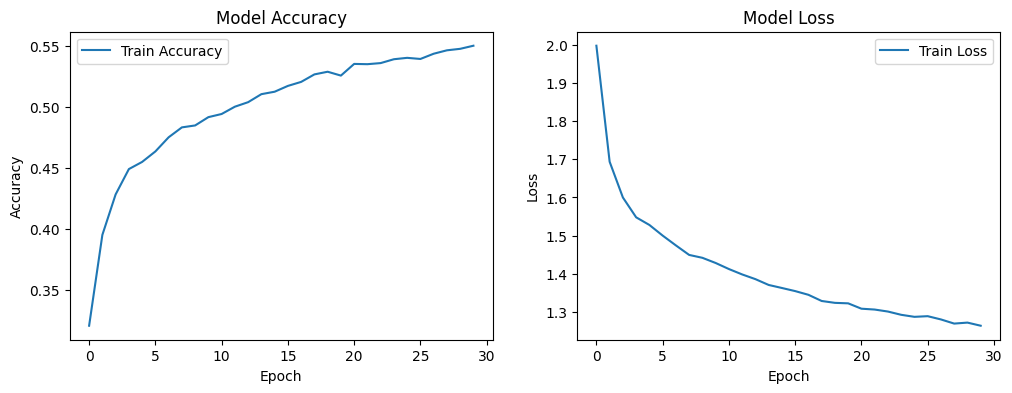

In [15]:
# Predict test set
pred_y_keras = keras_model.predict(x_test)
pred_y_labels = np.argmax(pred_y_keras, axis=1)

# Evaluate the model
test_loss, test_acc = keras_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy (Keras): {test_acc}")

# Classification report
print("Classification Report (Keras):")
print(classification_report(y_test_Flatten, pred_y_labels))

# Confusion matrix
print("Confusion Matrix (Keras):")
print(confusion_matrix(y_test_Flatten, pred_y_labels))

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



## Vẽ Biểu Đồ So Sánh
Sau khi thu thập được Training Time và Memory Usage của các framework, vẽ biểu đồ so sánh.

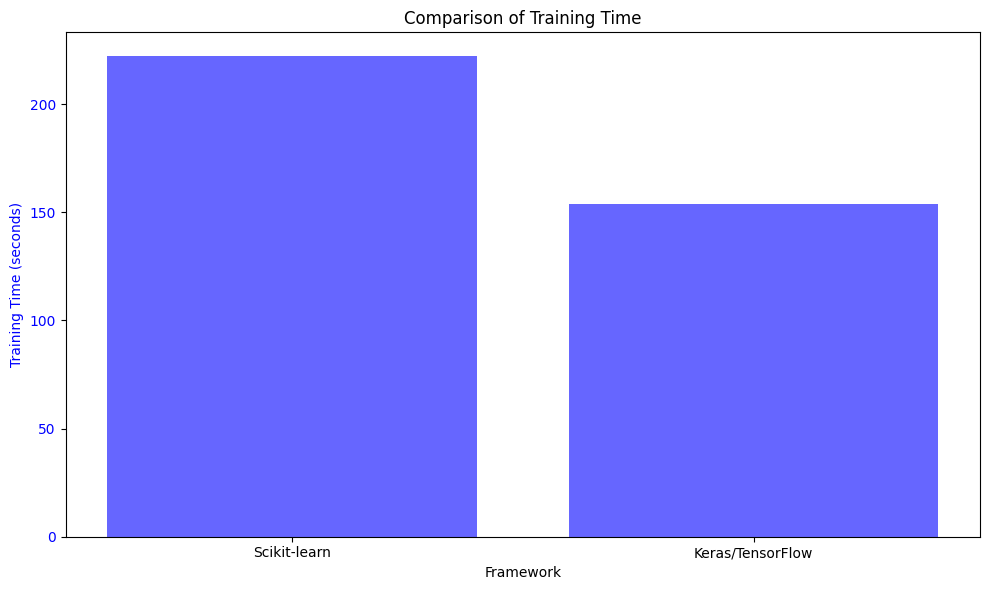

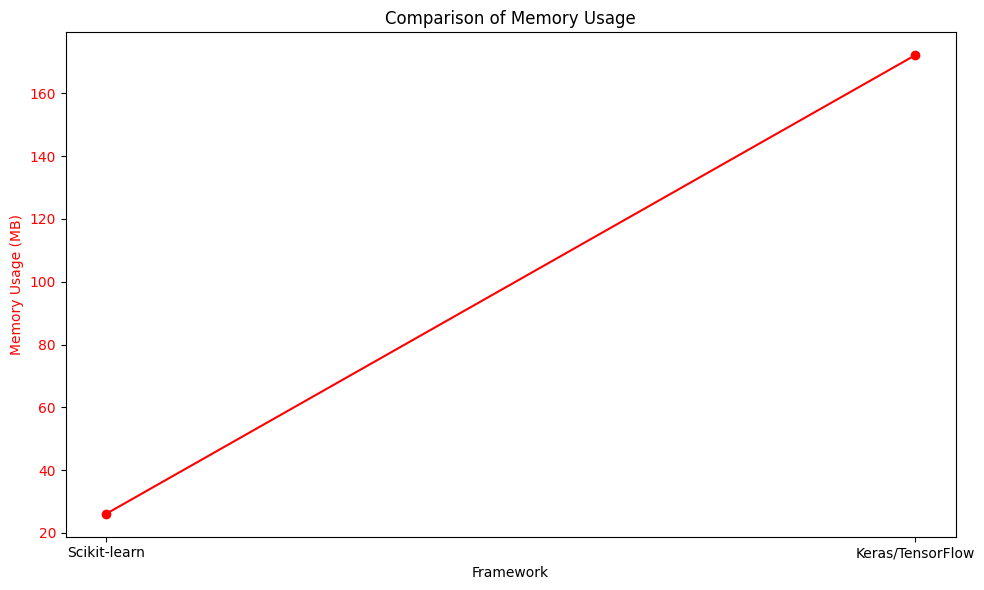

In [16]:
# Tạo biểu đồ cho Training Time
frameworks = ['Scikit-learn', 'Keras/TensorFlow']
training_times = [ScikitLearn_training_time, keras_training_time]
memory_usage = [ScikitLearn_memory_usage, keras_memory_usage]  

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(frameworks, training_times, color='b', alpha=0.6, label="Training Time (seconds)")
ax1.set_xlabel('Framework')
ax1.set_ylabel('Training Time (seconds)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.title('Comparison of Training Time')
fig.tight_layout()
plt.show()

# Tạo biểu đồ cho Memory Usage
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(frameworks, memory_usage, color='r', marker='o', label="Memory Usage (MB)")
ax2.set_xlabel('Framework')
ax2.set_ylabel('Memory Usage (MB)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Comparison of Memory Usage')
fig.tight_layout()
plt.show()


## Model Design and Training with PyTorch

### Tiền xử lý phù hợp với PyTorch

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Chuyển sang Tensor của PyTorch
# Tensor là kiểu dữ liệu cơ bản của PyTorch để sử dụng GPU và các phép tính toán tensor, xử lý nhanh hơn so với numpy array
# Tensor trở thành cốt lõi trong việc xây dựng các mô hình học sâu hiệu quả và hiện đại.
X_train_tensor = torch.tensor(x_train, dtype=torch.float32) # Kiểu dữ liệu số thực 32-bit (phù hợp cho tính toán học sâu)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32) 

y_train_tensor = torch.tensor(y_train_Flatten, dtype=torch.long) # Kiểu số nguyên 64-bit (phù hợp cho bài toán phân loại)
y_test_tensor = torch.tensor(y_test_Flatten, dtype=torch.long) 

# Tạo TensorDataset 
# Kết hợp các Tensor đầu vào và nhãn thành một tập dữ liệu (dataset) có thể quản lý dễ dàng.
train_dataset = TensorDataset(X_train_tensor, y_train_tensor) # Tập train
test_dataset = TensorDataset(X_test_tensor, y_test_tensor) # Tập test

# Tạo DataLoader
# Chia dữ liệu thành các batch nhỏ => Sử dụng tài nguyên hiệu quả hơn (đặc biệt khi huấn luyện trên GPU)
# Tự động quản lý thứ tự dữ liệu, xáo trộn (shuffle), và tạo iterator để duyệt qua các batch.
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # Xáo trộn dữ liệu sau mỗi epoch để tăng hiệu quả huấn luyện.
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # Không xáo trộn dữ liệu để đảm bảo tính nhất quán khi đánh giá.

### Xây dựng mô hình MLP

In [18]:
class MLP_PyTorch(nn.Module):
    # nn.Module là class cơ bản mà tất cả model NN trong PyTorch đều kế thừa 
    # Cung cấp thuộc tính, phương pháp cơ bản để train, build, save model
    def __init__(self):
        super(MLP_PyTorch, self).__init__() # Khởi tạo đảm bảo các chức năng của nn.Module đều hoạt động
        
        # Fully connected layer 1  
        # Input : 3072 chiều 
        # Output : 512 chiều 
        self.fc1 = nn.Linear(3072, 512)   # Input -> Hidden layer 1
        
        # Batch Normalization cho layer 1 (512 chiều) 
        # Chuẩn hóa dữ liệu trong mỗi batch để giữ giá trị đầu ra có phân phối ổn định (trung bình = 0, phương sai = 1)
        self.bn1 = nn.BatchNorm1d(512)    
        self.dropout1 = nn.Dropout(0.2)

        self.fc2 = nn.Linear(512, 256)    # Hidden layer 1 -> Hidden layer 2
        self.bn2 = nn.BatchNorm1d(256)    # Batch Normalization cho layer 2
        self.dropout2 = nn.Dropout(0.2)
        
        self.fc3 = nn.Linear(256, 128)    # Hidden layer 2 -> Hidden layer 3
        self.bn3 = nn.BatchNorm1d(128)    # Batch Normalization cho layer 3
        self.dropout3 = nn.Dropout(0.3)
        
        self.fc4 = nn.Linear(128, 10)     # Tầng đầu ra, giảm từ 256 chiều xuống 10 chiều (phù hợp cho bài toán phân loại 10 lớp của CIFAR-10).
        
        # Hàm kích hoạt ReLU (Rectified Linear Unit) được áp dụng sau mỗi tầng ẩn để thêm phi tuyến tính.
        # Công thức đơn giản : f(x) = max(0,x)
        # ReLU giúp tránh hiện tượng vanishing gradient vì gradient của ReLU là 1 khi x > 0
        # Nhược điểm : 
        # - Khi x <= 0 gradient của ReLU bằng 0. Điều này có thể khiến một số neuron "chết" (không cập nhật được trọng số trong suốt quá trình huấn luyện).
        # - Đầu ra của ReLU không cân bằng quanh gốc tọa độ (mean ≠ 0), có thể làm chậm tốc độ hội tụ trong quá trình huấn luyện 
        self.relu = nn.ReLU() 
        #self.dropout = nn.Dropout(0.3)  # Dropout 30%

    def forward(self, x): # Hàm dự đoán
        x = self.fc1(x)
        x = self.bn1(x)      # BatchNorm layer 1
        x = self.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)      # BatchNorm layer 2
        x = self.relu(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.bn3(x)      # BatchNorm layer 3
        x = self.relu(x)
        x = self.dropout3(x) # Dropout layer cuối

        x = self.fc4(x)      # Output layer
        return x

### Khởi tạo mô hình

In [19]:
# Kiểm tra GPU
# Việc sử dụng GPU giúp tăng tốc quá trình huấn luyện, đặc biệt khi làm việc với dữ liệu lớn hoặc mô hình phức tạp.
# Nếu GPU khả dụng: cuda
# Nếu không: cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Khởi tạo mô hình
# Đưa mô hình sang thiết bị (GPU hoặc CPU) để đảm bảo tính nhất quán khi tính toán.
# Giúp mô hình hoạt động trên thiết bị được chọn, đồng bộ với dữ liệu (dữ liệu huấn luyện cũng cần chuyển sang thiết bị tương ứng)
model = MLP_PyTorch().to(device) 

# Tính toán sự khác biệt giữa đầu ra dự đoán của mô hình và nhãn thực tế bằng công thức cross-entropy
# Tự động áp dụng Softmax trên đầu ra để chuẩn hóa thành xác suất
# Sau đó tính toán giá trị mất mát dựa trên cross-entropy
loss_criterion = nn.CrossEntropyLoss()  # Loss cho bài toán phân loại

# Đây là bộ tối ưu hóa dựa trên thuật toán Adam (Adaptive Moment Estimation).
# Adam kết hợp ưu điểm của SGD (Stochastic Gradient Descent) và Momentum, giúp huấn luyện nhanh và hiệu quả hơn.
# Sau đó lấy tất cả các tham số của mô hình (các trọng số và bias) để tối ưu hóa.
# Hệ số learning rate điều chỉnh mức độ thay đổi của W trong mỗi lần cập nhật
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Thêm scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

print(model)  # In kiến trúc mô hình

Using device: cuda
MLP_PyTorch(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


### Huấn luyện mô hình

Epoch [1/30], Loss: 1.7086
Epoch [2/30], Loss: 1.5062
Epoch [3/30], Loss: 1.4185
Epoch [4/30], Loss: 1.3581
Epoch [5/30], Loss: 1.3021
Epoch [6/30], Loss: 1.2611
Epoch [7/30], Loss: 1.2235
Epoch [8/30], Loss: 1.1879
Epoch [9/30], Loss: 1.1571
Epoch [10/30], Loss: 1.1234
Epoch [11/30], Loss: 1.0293
Epoch [12/30], Loss: 0.9961
Epoch [13/30], Loss: 0.9733
Epoch [14/30], Loss: 0.9500
Epoch [15/30], Loss: 0.9217
Epoch [16/30], Loss: 0.9058
Epoch [17/30], Loss: 0.8807
Epoch [18/30], Loss: 0.8586
Epoch [19/30], Loss: 0.8382
Epoch [20/30], Loss: 0.8228
Epoch [21/30], Loss: 0.7562
Epoch [22/30], Loss: 0.7297
Epoch [23/30], Loss: 0.7201
Epoch [24/30], Loss: 0.7055
Epoch [25/30], Loss: 0.6916
Epoch [26/30], Loss: 0.6821
Epoch [27/30], Loss: 0.6682
Epoch [28/30], Loss: 0.6498
Epoch [29/30], Loss: 0.6506
Epoch [30/30], Loss: 0.6353
Training Time: 58.22 seconds
Total GPU Memory Allocated: 43.76 MB
Total GPU Memory Reserved: 68.00 MB


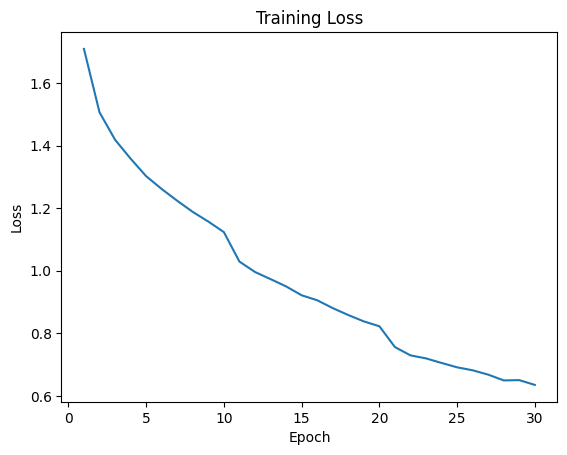

In [20]:
import time

# Huấn luyện mô hình
epochs = 30
start_time = time.time() # Thời gian bắt đầu
loss_values = []  # Lưu giá trị loss qua từng epoch

for epoch in range(epochs):
    model.train() # Chuyển mô hình sang chế độ huấn luyện, đảm bảo các cơ chế như dropout và batch normalization hoạt động đúng
    running_loss = 0.0 # Tổng giá trị loss của tất cả các batch trong 1 epoch
    
    for X_batch, y_batch in train_loader: # Mỗi batch chứa data và label tương ứng của tập dữ liệu 
        X_batch, y_batch = X_batch.to(device), y_batch.to(device) # Chuyển dữ liệu và nhãn sang thiết bị (GPU hoặc CPU) để tính toán
        
        optimizer.zero_grad()  # Xóa gradient cũ, vì khi không xóa gradient sẽ cộng dồn gây sai lệch
        pre = model(X_batch)  # Forward : Nhận vào X_batch và trả về dự đoán output
        loss = loss_criterion(pre, y_batch)  # Tính loss giữa dự đoán và thực tế
        loss.backward()  # Tính gradient của loss với các tham số của mô hình (backpropagation)
        optimizer.step()  # Cập nhật trọng số mô hình dựa trên gradient vừa tính toán
        
        running_loss += loss.item()
    
    scheduler.step()
    
    epoch_loss = running_loss / len(train_loader) # Loss trung bình tất cả batch từng epoch
    loss_values.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")     

end_time = time.time() # Thời gian kết thúc
PT_tranningtime = end_time - start_time
print(f"Training Time: {PT_tranningtime:.2f} seconds")

# Tổng GPU memory sau huấn luyện
print(f"Total GPU Memory Allocated: {torch.cuda.memory_allocated() / 1024 ** 2:.2f} MB")
print(f"Total GPU Memory Reserved: {torch.cuda.memory_reserved() / 1024 ** 2:.2f} MB")
PT_trainningmemory = torch.cuda.memory_allocated() / 1024 ** 2
torch.cuda.empty_cache()
# Vẽ đồ thị loss
plt.plot(range(1, epochs + 1), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Đánh giá mô hình

In [21]:
# Chuyển mô hình sang evaluation mode
# Dropout: Trong chế độ đánh giá, Dropout sẽ bị tắt (không ngẫu nhiên loại bỏ neuron nào)
# Batch Normalization: Sử dụng giá trị trung bình và phương sai được tính trong quá trình huấn luyện, thay vì cập nhật từ batch hiện tại
# => Đảm bảo rằng mô hình đưa ra dự đoán ổn định và chính xác
model.eval()
correct = 0
total = 0

# Tắt tính gradient trong quá trình đánh giá
# Giảm bộ nhớ và tăng tóc độ (không cần cập nhật W, không lưu trữ gradient)
with torch.no_grad():
    for X_batch, y_batch in test_loader: # Mỗi batch chứa data và label tương ứng của tập kiểm tra
        X_batch, y_batch = X_batch.to(device), y_batch.to(device) # Chuyển dữ liệu và nhãn sang thiết bị (GPU hoặc CPU) để tính toán
        outputs = model(X_batch) # Forward : Nhận vào X_batch và trả về dự đoán output
        _, predicted = torch.max(outputs, 1) # Trả về giá trị lớn nhất đại diện cho lớp có xác suất cao nhất (Softmax) và label dự đoán của nó tức index (tương ứng với các lớp)
        total += y_batch.size(0) # Lấy số lượng mẫu trong batch hiện tại
        # So sánh nhãn dự đoán (predicted) với nhãn thực tế (y_batch), trả về true nếu giống và false nếu khác
        # Tính tổng số giá trị True (số lượng dự đoán đúng) trong tensor và chuyển thành số Python
        correct += (predicted == y_batch).sum().item() 

accuracy = 100 * correct / total # Độ chính xác 
print(f"Accuracy on test set: {accuracy:.2f}%")

Accuracy on test set: 58.19%


## Model Design and Training with PyTorch Lightning

### Tiền xử lý PyTorch Lightning tương tự như PyTorch truyền thống nên không cần ghi lại phần này

In [22]:
# Import thư viện mới 
from sklearn.metrics import classification_report, confusion_matrix
import pytorch_lightning as pl
import seaborn as sns
import torch.nn.functional as F
from pytorch_lightning import Trainer
from torch.optim import Adam
from pytorch_lightning.callbacks import Callback


### Xây dựng mô hình MLP


In [23]:
import pytorch_lightning as pl
import torch.nn as nn
from torch.optim import Adam
import logging
logging.basicConfig(level=logging.INFO)

class MLP_PyTorchLightning(pl.LightningModule):
    def __init__(self):
        super(MLP_PyTorchLightning, self).__init__() # Tương tự bên trên
        
        # Fully connected layer 1
        self.fc1 = nn.Linear(3072, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.2)  # Dropout 20% for Layer 1
        
        # Fully connected layer 2
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.2)  # Dropout 20% for Layer 2
        
        # Fully connected layer 3
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.3)  # Dropout 30% for Layer 3
        
        # Output layer
        self.fc4 = nn.Linear(128, 10)
        
        # Activation function
        self.relu = nn.ReLU()

        # Loss function
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, x):
        # Layer 1
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout1(x)

        # Layer 2
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout2(x)

        # Layer 3
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout3(x)

        # Output layer
        x = self.fc4(x)
        return x

    def training_step(self, batch, batch_idx): # Hàm huấn luyện
        x, y = batch # Tách batch thành data x và label y 
        preds = self(x) # Gọi forward để trả về dự đoán 
        loss = self.loss_fn(preds, y) # Tính toán loss giữa dự đoán và nhãn thật
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True) # Ghi lại giá trị loss trên thanh tiến trình hoặc lưu vào logger
        return loss

    def validation_step(self, batch, batch_idx): # Tương tự training_step, nhưng bổ sung tính toán độ chính xác và thực hiện logging theo epoch
        x, y = batch
        preds = self(x)
        loss = self.loss_fn(preds, y)
        acc = (preds.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, on_epoch=True, prog_bar=True)
        self.log("val_acc", acc, on_epoch=True, prog_bar=True)
        return {"val_loss": loss, "val_acc": acc}

    def configure_optimizers(self): # Khởi tạo optimizer Adam với learning rate 0.001, dùng để cập nhật trọng số của mô hình
        return Adam(self.parameters(), lr=0.001)
    
# Huấn luyện mô hình và ghi lại giá trị loss
class TrainingCallbackWithMemory(pl.Callback):
    def __init__(self):
        self.loss_values = []  # Lưu loss qua từng epoch
        self.gpu_memory_allocated = []  # Lưu GPU memory allocated sau mỗi epoch
        self.gpu_memory_reserved = []  # Lưu GPU memory reserved sau mỗi epoch

    def on_train_epoch_end(self, trainer, pl_module):
        # Lấy giá trị loss trung bình của epoch từ logger
        epoch_loss = trainer.callback_metrics['train_loss'].item()
        self.loss_values.append(epoch_loss)

        # Ghi lại GPU memory sử dụng
        if torch.cuda.is_available():
            allocated = torch.cuda.memory_allocated() / 1024 ** 2  # Chuyển sang MB
            reserved = torch.cuda.memory_reserved() / 1024 ** 2  # Chuyển sang MB
            self.gpu_memory_allocated.append(allocated)
            self.gpu_memory_reserved.append(reserved)


### Khởi tạo và huấn luyện mô hình

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3050 Ti Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name     | Type             | Params | Mode 
-------------------------------------------------------
0  | fc1      | Linear           | 1.6 M  | train
1  | bn1      | BatchNorm1d      | 1.0 K  | train
2  | dropout1 | Dropout          | 0      | train
3  | fc2      | Linear           | 131 K  | train
4  | bn2      | BatchNorm1d      | 512    | train
5  | dropout2 | Dropout          | 0      | train
6  | fc3      | Linear           | 32.9 K | train
7  | bn

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

C:\Users\DUC THIEN\AppData\Roaming\Python\Python311\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


C:\Users\DUC THIEN\AppData\Roaming\Python\Python311\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 29: 100%|██████████| 391/391 [00:04<00:00, 78.69it/s, v_num=0, train_loss_step=0.706, val_loss=1.440, val_acc=0.545, train_loss_epoch=0.686]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 391/391 [00:05<00:00, 77.17it/s, v_num=0, train_loss_step=0.706, val_loss=1.440, val_acc=0.545, train_loss_epoch=0.686]
Total GPU Memory Allocated: 26.76 MB
Total GPU Memory Reserved: 48.00 MB
Total GPU Memory Allocated: 26.76 MB
Training Time: 148.34 seconds


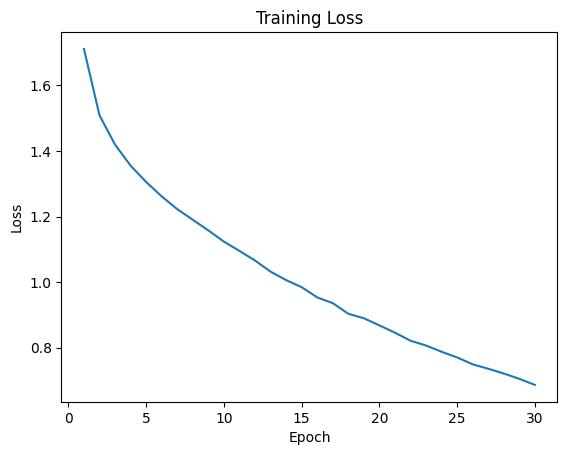

In [24]:
# Khởi tạo mô hình
model = MLP_PyTorchLightning()
callback = TrainingCallbackWithMemory()

# Huấn luyện với Trainer
# Đây là class chính của PyTorch Lightning, quản lý toàn bộ quy trình huấn luyện
# PyTorch Lightning tự động chọn phần cứng (CPU/GPU) để huấn luyện, nếu GPU có sẵn sẽ được sử dụng
# Gắn callback TrainingCallback để theo dõi giá trị loss trong quá trình huấn luyện
start_time = time.time()  # Thời gian bắt đầu huấn luyện
trainer = pl.Trainer(
    max_epochs=30,  # Số epoch
    accelerator="auto",  # Tự động chọn GPU/CPU
    callbacks=[callback]  # Gắn callback theo dõi
)
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)
# Sau khi huấn luyện, tổng GPU memory
if torch.cuda.is_available():
    total_memory_allocated = torch.cuda.memory_allocated() / 1024 ** 2
    total_memory_reserved = torch.cuda.memory_reserved() / 1024 ** 2
    print(f"Total GPU Memory Allocated: {total_memory_allocated:.2f} MB")
    print(f"Total GPU Memory Reserved: {total_memory_reserved:.2f} MB")
PTL_trainningmemory = total_memory_allocated
print(f"Total GPU Memory Allocated: {PTL_trainningmemory:.2f} MB")
    
end_time = time.time()  # Thời gian kết thúc huấn luyện

# Thời gian huấn luyện
PTL_tranningtime = end_time - start_time
print(f"Training Time: {PTL_tranningtime:.2f} seconds")

# Vẽ đồ thị loss qua từng epoch
plt.plot(range(1, len(callback.loss_values) + 1), callback.loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Đánh giá mô hình

In [25]:
# Đánh giá mô hình trên tập test
model.eval()  # Chuyển mô hình sang chế độ đánh giá
correct = 0
total = 0

# Tắt gradient để giảm bộ nhớ và tăng tốc độ
with torch.no_grad():
    for X_batch, y_batch in test_loader:  # Lặp qua từng batch trong tập test
        X_batch, y_batch = X_batch.to(model.device), y_batch.to(model.device)  # Chuyển dữ liệu sang thiết bị
        outputs = model(X_batch)  # Forward pass: Nhận đầu ra từ mô hình
        _, predicted = torch.max(outputs, 1)  # Lấy lớp dự đoán (chỉ số của giá trị lớn nhất)
        total += y_batch.size(0)  # Tổng số mẫu
        correct += (predicted == y_batch).sum().item()  # Tổng số dự đoán đúng

# Tính toán độ chính xác
accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy:.2f}%")


Accuracy on test set: 54.54%


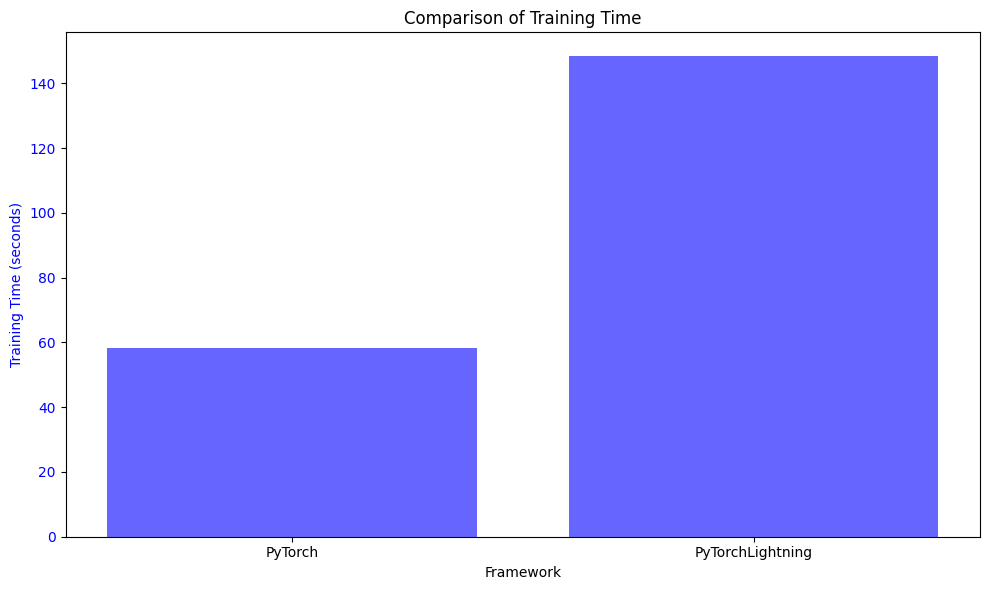

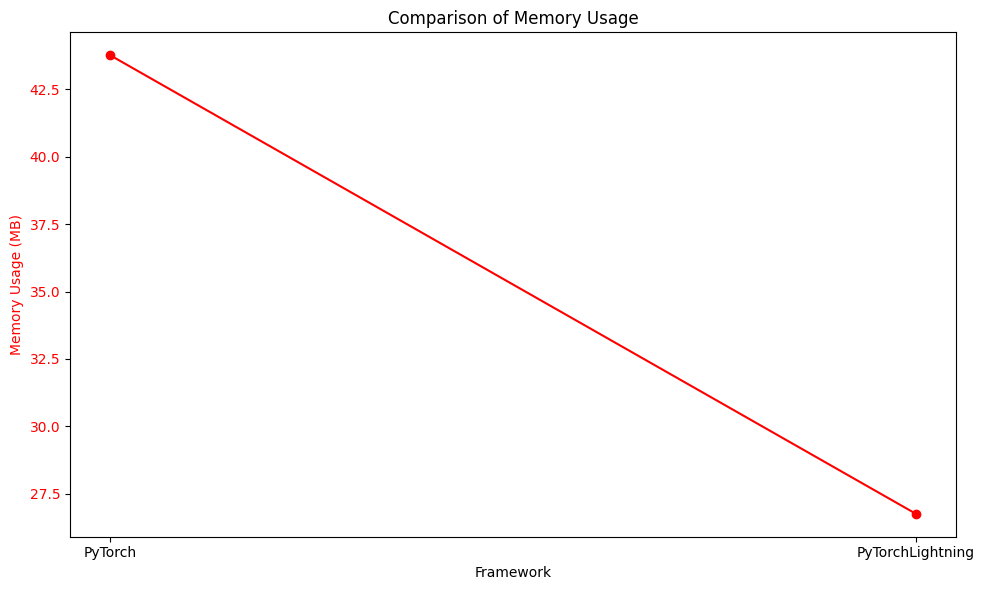

In [26]:
# Các giá trị thu được
frameworks = ['PyTorch', 'PyTorchLightning']
training_times = [PT_tranningtime, PTL_tranningtime]
memory_usage = [PT_trainningmemory, PTL_trainningmemory]  

# Tạo biểu đồ cho Training Time
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(frameworks, training_times, color='b', alpha=0.6, label="Training Time (seconds)")
ax1.set_xlabel('Framework')
ax1.set_ylabel('Training Time (seconds)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.title('Comparison of Training Time')
fig.tight_layout()
plt.show()

# Tạo biểu đồ cho Memory Usage
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(frameworks, memory_usage, color='r', marker='o', label="Memory Usage (MB)")
ax2.set_xlabel('Framework')
ax2.set_ylabel('Memory Usage (MB)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Comparison of Memory Usage')
fig.tight_layout()
plt.show()


## Đã hết